In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\insurance.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])


By,applying label encoding ,converting "male" to 0 and "female" to 1 for the "sex" column, and "no" to 0 and "yes" to 1  for the "smoker" column so that model can undersatnd binary columns of  categorical data.

In [6]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)


For non-binary categorical columns (like "region"), here i am using one-hot-encoding(ohc). It creates binary columns for each category and assigns 1 if the category is present, 0 otherwise.

The drop_first=True argument is used to avoid multicollinearity by dropping one of the one-hot encoded columns.

Using one-hot encoding for non-binary categorical data prevents the model from incorrectly assuming ordinal relationships between categories.

In [7]:
from sklearn.preprocessing import StandardScaler

# Select the numeric predictor columns
numeric_columns = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


the numeric columns in this DataFrame (age, bmi, children) will be standardized, with a mean of 0 and a standard deviation of 1.

Standardization helps regression models work effectively by ensuring that all features are on a similar scale, preventing some features from dominating others based solely on their magnitude.

Now, these numeric predictor columns (age, bmi, and children) are standardized, and i can use this preprocessed data for regression analysis.When we want to use  this data to train a regression model, we should also use the same scaler to transform the input data during prediction to maintain consistency in scale.

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Select the "bmi" variable as the independent variable (feature)
X = df[['bmi']]  # Independent variable (feature)
y = df['charges']  # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print("Intercept:", model.intercept_)
print("Coefficient (bmi):", model.coef_[0])

# Now you have a trained linear regression model.
# You can use it to make predictions or analyze the relationship between "bmi" and "charges."


Intercept: 13270.422265141257
Coefficient (bmi): 2401.0136182538276


here,we selected the "bmi" variable as the independent variable (feature) and the "charges" variable as the target variable.

It has created a linear regression model using LinearRegression() from scikit-learn.

Then, it requires to fit the model to the data using model.fit(X, y).

We printed, the model's intercept and coefficient for the "bmi" variable, which represents the linear relationship between "bmi" and "charges."

This code will train a linear regression model using "bmi" as the predictor and "charges" as the target variable without any additional validation. Please replace 'your_dataset.csv' with the actual path to your dataset file or use the appropriate data loading code for your specific data source.

In [9]:
#y is the predicted target variable (charges in your case).
#x1 is the independent variable (bmi in your case).
#b is the intercept (model.intercept_).
#b1 is the coefficient for the independent variable (model.coef_[0]).

In [10]:
#y = 13270.422265141257 + 2401.0136182538276 * bmi
# y = charges


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using the trained model
predicted_charges = model.predict(X)

# Calculate the residuals
residuals = y - predicted_charges

# Calculate MAE, MSE, RMSE, and R2
mae = mean_absolute_error(y, predicted_charges)
mse = mean_squared_error(y, predicted_charges)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_charges)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 9172.351145507562
Mean Squared Error (MSE): 140777900.09850758
Root Mean Squared Error (RMSE): 11864.986308399499
R-squared (R2): 0.03933913991786253


Here, the values of MAE,MSE,RMSE & R2 is derived using packages of sci-kit learn.

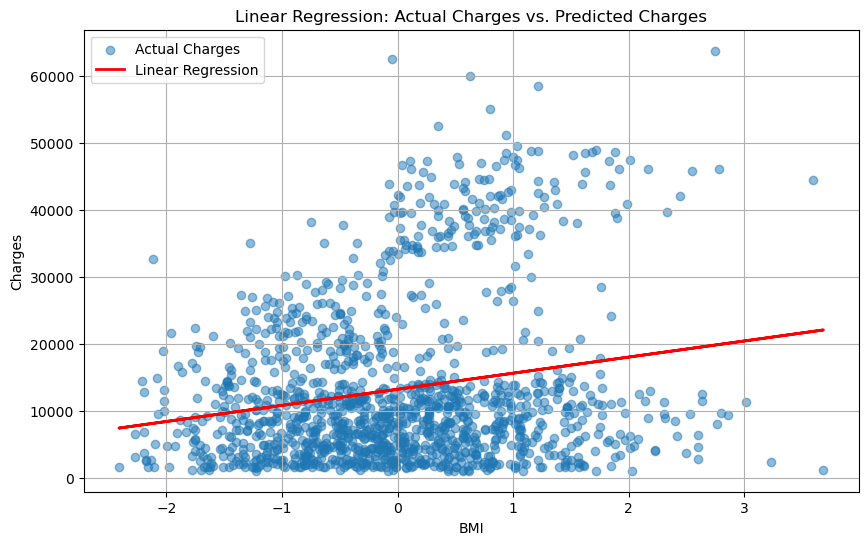

In [13]:
import matplotlib.pyplot as plt

# Make predictions using the trained model
predicted_charges = model.predict(X)

# Create a scatter plot of actual charges vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Actual Charges")
plt.plot(X, predicted_charges, color='red', linewidth=2, label="Linear Regression")
plt.title('Linear Regression: Actual Charges vs. Predicted Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)

plt.show()


 Using matplotlib package here vizuals are created shwing regression line of comparing target variable and predictor variables.

# now let's take multilinear regression by adding variables

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [16]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500,0,0,1


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your features and target variable
X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Create a multilinear regression model
model = LinearRegression()

# Fit the model to the entire dataset
model.fit(X, y)

# Make predictions using the entire dataset
y_pred = model.predict(X)

# Evaluate the model (on the same data, which is not typical, but useful for demonstration)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = (mse) ** 0.5
r2 = r2_score(y, y_pred)

# Print model intercept and evaluation metrics
print("Model Intercept:", model.intercept_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Model Intercept: 9053.492450440157
Mean Absolute Error (MAE): 4170.886894163589
Mean Squared Error (MSE): 36501893.00741544
Root Mean Squared Error (RMSE): 6041.6796511744515
R-squared (R2): 0.7509130345985207
Model Coefficients:
age: 3607.4727361941896
bmi: 2067.6919658434176
children: 572.9982099480684
sex: -131.31435939511468
smoker: 23848.53454191283
region_northwest: -352.9638994246452
region_southeast: -1035.0220493878176
region_southwest: -960.0509913008286


In [ ]:
# MODEL EQUATION

#y = 9053.49 + (3607.47 * x1) + (2067.69 * x2) + (572.99 * x3) + (-131.31 * x4) + (23848.53 * x5) + (-352.96 * x6) + (-1035.02 * x7) + (-960.05 * x8)

# x1 = age , x2 = bmi , x3 = children ,x4 = sex,

# x5 = smoker, x6 = region_northwest , x7 = region_southeast , x8 = region_southwest


(1) The intercept of approximately 9053.49 is the estimated baseline value of the 'charges' when all independent variables (age, bmi, children, sex, smoker, and region) are zero.

(2) A one-unit increase in age is associated with an increase in 'charges' by approximately 3607.47 units.

(3) In case of bmi,a one-unit increase in BMI is associated with an increase in 'charges' by approximately 2067.69 units.

(4) For children , each additional child is associated with an increase in target variable 'charges' by approximately 572.99 units.

(5) Being male (sex=1) is associated with a decrease in 'charges' by approximately 131.31 units compared to being female (sex=0).

(6) Being a smoker (smoker=1) is associated with a significant increase in 'charges' by approximately 23848.53 units compared to non-smokers.

(7) Living in the Northwest region is associated with a decrease in 'charges' by approximately 352.96 units compared to living in the base region.

(8) Living in the Southeast region is associated with a decrease in 'charges' by approximately 1035.02 units compared to living in the base region.

(9) Living in the Southwest region is associated with a decrease in 'charges' by approximately 960.05 units compared to living in the base region.

(10) The R-squared (R2) value of approximately 0.7509 indicates that the model explains about 75.09% of the variance in the 'charges' variable. This suggests that the model provides a reasonable fit to the data, but there may still be unexplained variance.

(11)The Mean Absolute Error (MAE) of approximately 4170.89 represents the average absolute difference between the predicted charges and the actual charges in the dataset.

(12)The Mean Squared Error (MSE) of approximately 36501893.01 is the average squared difference between predicted and actual charges.

(13)The Root Mean Squared Error (RMSE) of approximately 6041.68 is the square root of the MSE and represents the typical error in predicted charges.

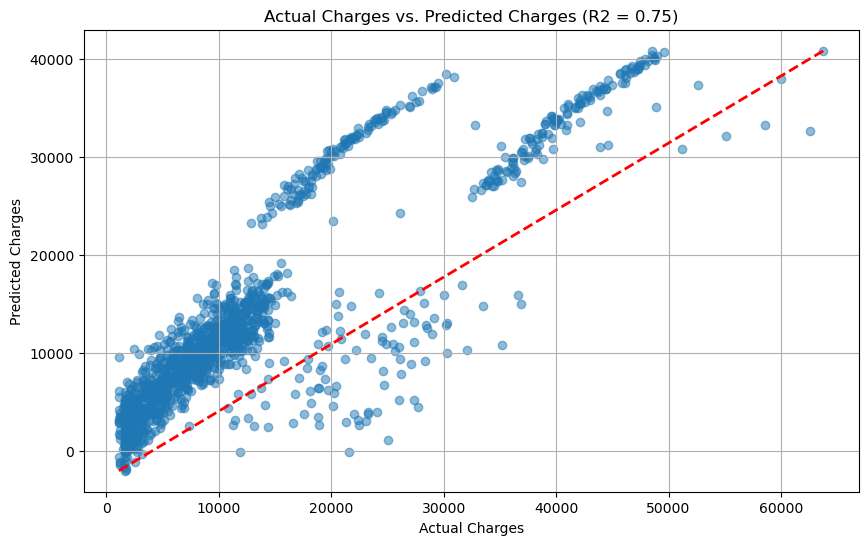

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Define your features and target variable
X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Create a multilinear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the entire dataset
y_pred = model.predict(X)

# Calculate R-squared (R2) for model performance evaluation
r_squared = r2_score(y, y_pred)

# Create scatter plot for visualization with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(f"Actual Charges vs. Predicted Charges (R2 = {r_squared:.2f})")
plt.grid(True)
plt.show()


To visualize the multilinear regression model, the  scatter plots has been created to compare the actual charges (ground truth) with the predicted charges from the model. 

This code is generating a scatter plot where the x-axis represents the actual charges, and the y-axis represents the predicted charges by the multilinear regression model. The R-squared value is displayed in the plot's title to indicate the goodness of fit.

The scatter plot will help to  visually assess how well the model's predictions align with the actual data points. Ideally, the points should form a linear pattern, indicating a good fit of the model to the data.